In [116]:
from os import listdir
from os.path import isfile, join
import pandas as pd
import ezodf
import numpy as np
import re
import pandas as pd
import glob, os
import matplotlib as mpl
import matplotlib.pyplot as plt
import datetime
from decimal import Decimal

In [2]:
### Functions 

def ods_to_df(doc_file_path):
    # convert the first sheet to a pandas.DataFrame
    
    doc = ezodf.opendoc(doc_file_path)
    
    sheet = doc.sheets[0]
    df_dict = {}
    for i, row in enumerate(sheet.rows()):
        # row is a list of cells
        # assume the header is on the first row
        if i == 0:
            # columns as lists in a dictionary
            df_dict = {cell.value:[] for cell in row}
            # create index for the column headers
            col_index = {j:cell.value for j, cell in enumerate(row)}
            continue
        for j, cell in enumerate(row):
            # use header instead of column index
            df_dict[col_index[j]].append(cell.value)
    # and convert to a DataFrame
    df = pd.DataFrame(df_dict)
    
    return(df)

In [4]:
# Variables to Read in Data

mypath = '/Users/diego/Desktop/Projects_Code/marginal_value_ei/Data/meter_data'
onlyfiles = [f for f in listdir(mypath) if isfile(join(mypath, f))]

names = ['unnamed: 0',
 'alumbrado publico',
 'cargos varios',
 'comercializacion',
 'csmo. energía:',
 'energia (kwh)',
 'fecha factura ant.:',
 'fecha factura:',
 'iva'        ,
 'regulacion ine',
 'subsidio alumb. p�blico menor 150 kwh',
 'subsidio comercializacion menor 150 kwh',
 'subsidio consumo menor 150 kwh',
 'subsidio a jubilados con consumo menor 150kwh',
 'tarifa:',
 'total']

In [6]:
# Read Data

dfs = []
for file_name in onlyfiles[1:]:
    
    split_name = file_name.split('.')[0]
    split_type = file_name.split('.')[1]

    print(file_name)
    if split_type == 'csv':
        data = pd.read_csv(mypath + '/' + file_name) 
        data.columns = map(str.lower, data.columns)
    else: 
        data = ods_to_df(mypath+ '/' + file_name)
        data.columns.values[0] = "unnamed: 0"
        data.columns = map(str.lower, data.columns)

    # Identify missing columns, add NANs new data frame, append
    data_column_names = list(data.columns)
    missing_column_list = np.setdiff1d(names,data_column_names)

    for missing_column in range(0,len(missing_column_list)):
        data[missing_column_list[missing_column]] = np.nan

    # Create DF and add ID    
    
    nis = file_name.split('_')
    data_ordered = data[names]
    data_ordered['nis'] = nis[0]

    dfs.append(data_ordered)

2000500_1.csv
2000500_10.csv
2000500_11.csv
2000500_12.csv
2000500_2.csv
2000500_3.ods


/usr/local/lib/python3.6/site-packages/ipykernel/__main__.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2000500_8.csv
2000500_9.csv
2000557_1.csv
2000557_12.csv
2000557_2.csv
2000557_3.ods
2000570_3.ods
2000588_3.ods
2000612_1.csv
2000612_10.csv
2000612_11.csv
2000612_12.csv
2000612_2.csv
2000612_3.ods
2000612_8.csv
2000612_9.csv
2000613_3.ods
2000623_3.ods
2000624_1.csv
2000624_10.csv
2000624_11.csv
2000624_12.csv
2000624_2.csv
2000624_3.ods
2000624_8.csv
2000624_9.csv
2000714_1.csv
2000714_10.csv
2000714_11.csv
2000714_12.csv
2000714_2.csv
2000714_3.ods
2000714_7.csv
2000714_8.csv
2000714_9.csv
2000761_1.csv
2000761_12.csv
2000761_2.csv
2000761_3.ods
2000771_1.csv
2000771_12.csv
2000771_2.csv
2000771_3.ods
2001006_1.csv
2001006_10.csv
2001006_11.csv
2001006_12.csv
2001006_2.csv
2001006_3.ods
2001006_7.csv
2001006_8.csv
2001006_9.csv
2001011_1.csv
2001011_10.csv
2001011_11.csv
2001011_12.csv
2001011_2.csv
2001011_3.ods
2001011_8.csv
2001011_9.csv
2001250_1.csv
2001250_12.csv
2001250_2.csv
2001250_3.ods
2001405_1.csv
2001405_10.csv
2001405_11.csv
2001405_12.csv
2001405_2.csv
2001405_3.od

2053432_12.csv
2053432_2.csv
2053432_3.ods
2053432_8.csv
2053432_9.csv
2053444_3.ods
2053482_1.csv
2053482_10.csv
2053482_11.csv
2053482_12.csv
2053482_2.csv
2053482_3.ods
2053482_7.csv
2053482_8.csv
2053482_9.csv
2053490_1.csv
2053490_12.csv
2053490_2.csv
2053490_3.ods
2053561_1.csv
2053561_12.csv
2053561_2.csv
2053561_3.ods
2053575_1.csv
2053575_10.csv
2053575_11.csv
2053575_12.csv
2053575_3.ods
2053575_7.csv
2053575_8.csv
2053575_9.csv
2053649_1.csv
2053649_10.csv
2053649_11.csv
2053649_12.csv
2053649_2.csv
2053649_3.ods
2053649_7.csv
2053649_8.csv
2053649_9.csv
2053676_1.csv
2053676_12.csv
2053676_2.csv
2053676_3.ods
2053687_1.csv
2053687_10.csv
2053687_11.csv
2053687_12.csv
2053687_3.ods
2053687_8.csv
2053687_9.csv
2053690_1.csv
2053690_10.csv
2053690_11.csv
2053690_12.csv
2053690_2.csv
2053690_3.ods
2053690_7.csv
2053690_8.csv
2053690_9.csv
2053691_1.csv
2053691_12.csv
2053691_2.csv
2053691_3.ods
2053732_1.csv
2053732_12.csv
2053732_2.csv
2053732_3.ods
2053735_1.csv
2053735_10.cs

3129115_3.ods
3129115_7.csv
3129115_8.csv
3129115_9.csv
3250855_3.ods
df_data.csv


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xed in position 11: invalid continuation byte

In [168]:
### Read in Detalles Casas

detalles = pd.read_csv('/Users/diego/Downloads/Proyecto_LUZERO - detalles_casas(1).csv')
detalles = detalles[['encuesta_id','num_medidor']]
detalles.columns = ['encuesta_id', 'nis']

# Solving a weird formatting issue
new_nis = []
for val in detalles['nis']:
    new_nis.append(('%f' % val).rstrip('0').rstrip('.'))
    
detalles['nis'] = new_nis

In [277]:
### Read in the Endline

##############################################
##############################################
##############################################

endline = pd.read_csv('/Users/diego/Downloads/Proyecto_LUZERO - Copy of endline_survey_2018_03_15_10_29_02_481895.csv')   

tratamiento = endline[endline['participacion_estudio'] == 'si']
tratamiento['encuesta_id'] = tratamiento['encuesta_id'].astype(int)
tratamiento['ingresos_mensuales'] = pd.to_numeric(tratamiento['ingresos_mensuales'],errors='coerce')
tratamiento['gastos_mensuales'] = pd.to_numeric(tratamiento['gastos_mensuales'],errors='coerce')
tratamiento['celular'] = pd.to_numeric(tratamiento['celular'],errors='coerce')
tratamiento['internet'] = pd.to_numeric(tratamiento['internet'],errors='coerce')
tratamiento['radio'] = pd.to_numeric(tratamiento['radio'],errors='coerce')
tratamiento['television'] = pd.to_numeric(tratamiento['television'],errors='coerce')
tratamiento['computadora'] = pd.to_numeric(tratamiento['computadora'],errors='coerce')
tratamiento['refrigerador'] = pd.to_numeric(tratamiento['refrigerador'],errors='coerce')
tratamiento['abanico'] = pd.to_numeric(tratamiento['abanico'],errors='coerce')
tratamiento['microondas'] = pd.to_numeric(tratamiento['microondas'],errors='coerce')
tratamiento['licuadora'] = pd.to_numeric(tratamiento['licuadora'],errors='coerce')
tratamiento['equipo'] = pd.to_numeric(tratamiento['equipo'],errors='coerce')
tratamiento['lavadora'] = pd.to_numeric(tratamiento['lavadora'],errors='coerce')
tratamiento['secadora'] = pd.to_numeric(tratamiento['secadora'],errors='coerce')
tratamiento['plancha'] = pd.to_numeric(tratamiento['plancha'],errors='coerce')
tratamiento['num_personas'] = pd.to_numeric(tratamiento['num_personas'],errors='coerce')
tratamiento['financiamiento_eficiencia_tamano'] = pd.to_numeric(tratamiento['financiamiento_eficiencia_tamano'],errors='coerce')
tratamiento['financiamiento_eficiencia_meses'] = pd.to_numeric(tratamiento['financiamiento_eficiencia_meses'],errors='coerce')
tratamiento['financiamiento_solar_tamano'] = pd.to_numeric(tratamiento['financiamiento_solar_tamano'],errors='coerce')
tratamiento['financiamiento_solar_meses'] = pd.to_numeric(tratamiento['financiamiento_solar_meses'],errors='coerce')


casa_tratamiento = tratamiento[tratamiento['tipo_encuesta'] == 'casa']
micro_tratamiento = tratamiento[tratamiento['tipo_encuesta'] == 'micro_empresa']


/usr/local/lib/python3.6/site-packages/ipykernel/__main__.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/usr/local/lib/python3.6/site-packages/ipykernel/__main__.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/usr/local/lib/python3.6/site-packages/ipykernel/__main__.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-vers

In [8]:
df_data = pd.concat(dfs)

In [ ]:
df_data.to_csv('/Users/diego/Desktop/Projects_Code/marginal_value_ei/Data/meter_data/df_data.csv')

In [35]:
#### EXAMPLE for one household

this_one = df_data[df_data['nis']== '2533062']
this_one['date']= pd.to_datetime(this_one['fecha factura:'],format="%d-%m-%Y")
this_one['month']= this_one['date'].dt.month
this_one['year']= this_one['date'].dt.year

/usr/local/lib/python3.6/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
/usr/local/lib/python3.6/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
/usr/local/lib/python3.6/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pan

In [60]:
this_one_2017 = this_one[this_one['year'] == 2017]



/usr/local/lib/python3.6/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


In [81]:
energy_vals = []
for val in this_one_2017['csmo. energía:']:
    energy_vals.append(re.sub('kWh','',str(val)).strip()) 
    
    
cordoba_vals = []
for val in this_one_2017['energia (kwh)']:
    cordoba_vals.append(re.sub(',','',str(val)).strip()) 
    
this_one_2017['energy_kwh'] = pd.to_numeric(this_one_2017['energy_kwh'])
this_one_2017['energy_cords'] = pd.to_numeric(this_one_2017['energy_cords'])

/usr/local/lib/python3.6/site-packages/ipykernel/__main__.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/usr/local/lib/python3.6/site-packages/ipykernel/__main__.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [84]:
this_one_2017_plot = this_one_2017.groupby("month")['energy_kwh'].mean()

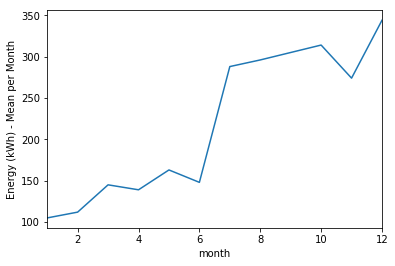

In [96]:
this_one_2017_plot.plot()
plt.ylabel('Energy (kWh) - Mean per Month')

In [92]:
this_one_2017.sort_values('date') 

,unnamed: 0,alumbrado publico,cargos varios,comercializacion,csmo. energía:,energia (kwh),fecha factura ant.:,fecha factura:,iva,regulacion ine,...,subsidio consumo menor 150 kwh,subsidio a jubilados con consumo menor 150kwh,tarifa:,total,nis,date,month,year,energy_kwh,energy_cords
7,7.0,74.24,NaN,29.39,105 kWh,497.68,11-12-2016,11-01-2017,NaN,3.15,...,-262.36,NaN,T-0,318.62,2533062,2017-01-11,1,2017,105,497.68
9,9.0,74.24,NaN,29.39,105 kWh,497.68,11-12-2016,11-01-2017,NaN,3.15,...,-262.36,NaN,T-0,318.62,2533062,2017-01-11,1,2017,105,497.68
5,5.0,74.24,NaN,29.39,105 kWh,497.68,11-12-2016,11-01-2017,NaN,3.15,...,-262.36,NaN,T-0,318.62,2533062,2017-01-11,1,2017,105,497.68
8,8.0,74.24,NaN,29.39,105 kWh,497.68,11-12-2016,11-01-2017,NaN,3.15,...,-262.36,NaN,T-0,318.62,2533062,2017-01-11,1,2017,105,497.68
10,10.0,74.24,NaN,29.39,105 kWh,497.68,11-12-2016,11-01-2017,NaN,3.15,...,-262.36,NaN,T-0,318.62,2533062,2017-01-11,1,2017,105,497.68
11,11.0,74.24,NaN,29.39,105 kWh,497.68,11-12-2016,11-01-2017,NaN,3.15,...,-262.36,NaN,T-0,318.62,2533062,2017-01-11,1,2017,105,497.68
8,8.0,74.52,NaN,29.50,112 kWh,550.00,11-01-2017,08-02-2017,NaN,3.40,...,-289.95,NaN,T-0,343.89,2533062,2017-02-08,2,2017,112,550.00
6,6.0,74.52,NaN,29.50,112 kWh,550.00,11-01-2017,08-02-2017,NaN,3.40,...,-289.95,NaN,T-0,343.89,2533062,2017-02-08,2,2017,112,550.00
7,7.0,74.52,NaN,29.50,112 kWh,550.00,11-01-2017,08-02-2017,NaN,3.40,...,-289.95,NaN,T-0,343.89,2533062,2017-02-08,2,2017,112,550.00
9,9.0,74.52,NaN,29.50,112 kWh,550.00,11-01-2017,08-02-2017,NaN,3.40,...,-289.95,NaN,T-0,343.89,2533062,2017-02-08,2,2017,112,550.00


In [95]:
this_one_2017['energy_cords'].mean()

1238.7057142857143

In [281]:
#### Full data

bill_with_id = pd.merge(detalles, df_data, on='nis')

# Formatting Variables

# kwh and Cordobas
energy_vals = []
for val in bill_with_id['csmo. energía:']:
    energy_vals.append(re.sub('kWh','',str(val)).strip())
    
    
cordoba_vals = []
for val in bill_with_id['energia (kwh)']:
    cordoba_vals.append(re.sub(',','',str(val)).strip())
    
bill_with_id['energy_kwh'] = pd.to_numeric(energy_vals,errors='coerce')
bill_with_id['energy_cords'] = pd.to_numeric(cordoba_vals,errors='coerce')

# For dates
bill_with_id['date']= pd.to_datetime(bill_with_id['fecha factura:'],format="%d-%m-%Y")
bill_with_id['month']= bill_with_id['date'].dt.month
bill_with_id['year']= bill_with_id['date'].dt.year


# Houses and Micro-Entreprises
casa_bills = pd.merge(bill_with_id, casa_tratamiento, on='encuesta_id')
micro_bills = pd.merge(bill_with_id, micro_tratamiento, on='encuesta_id')




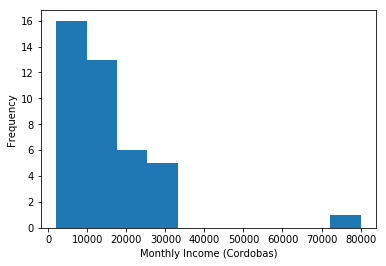

In [292]:
# plt.hist(casa_tratamiento['ingresos_mensuales'].dropna())
# plt.ylabel('Frequency')
# plt.xlabel('Monthly Income (Cordobas)')

plt.hist(micro_tratamiento['ingresos_mensuales'].dropna())
plt.ylabel('Frequency')
plt.xlabel('Monthly Income (Cordobas)')

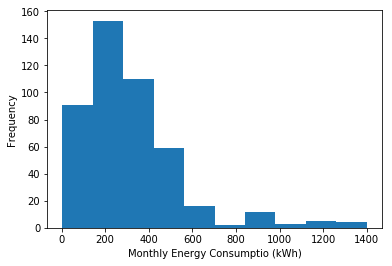

In [293]:
# casa_bills_2017 = casa_bills[casa_bills['year'] == 2017]

# casa_bills_2017_vals = (casa_bills_2017.groupby(['encuesta_id', 'month'])['energy_kwh'].mean()).reset_index()

# plt.hist(pd.to_numeric(casa_bills_2017_vals['energy_kwh'],errors='coerce').dropna())
# plt.ylabel('Frequency')
# plt.xlabel('Monthly Energy Consumptio (kWh)')


micro_bills_2017 = micro_bills[micro_bills['year'] == 2017]

micro_bills_2017_vals = (micro_bills_2017.groupby(['encuesta_id', 'month'])['energy_kwh'].mean()).reset_index()

plt.hist(pd.to_numeric(micro_bills_2017_vals['energy_kwh'],errors='coerce').dropna())
plt.ylabel('Frequency')
plt.xlabel('Monthly Energy Consumptio (kWh)')

In [278]:
# Average monthly income
avg_inc = casa_tratamiento['ingresos_mensuales'].mean()
avg_inc_no_out  = casa_tratamiento[casa_tratamiento['ingresos_mensuales'] < 40000]['ingresos_mensuales'].mean()
print("Average income is " + str(avg_inc) + " and " + str(avg_inc_no_out) + "  with no outliers")

avg_gastos  = casa_tratamiento['gastos_mensuales'].mean()
avg_gastos_no_out = casa_tratamiento[casa_tratamiento['gastos_mensuales'] < 40000]['gastos_mensuales'].mean()
print("Average expenditures are " + str(avg_gastos) + " and " + str(avg_gastos_no_out) + "  with no outliers")

print("bulbs " + str(casa_tratamiento['bombillas'].mean()))
print("cell " + str(casa_tratamiento['celular'].mean()))
print("internet " + str(casa_tratamiento['internet'].mean()))
print("radio " + str(casa_tratamiento['radio'].mean()))
print("television " + str(casa_tratamiento['television'].mean()))
print("computadora " + str(casa_tratamiento['computadora'].mean()))
print("refrigerador " + str(casa_tratamiento['refrigerador'].mean()))
print("abanico " + str(casa_tratamiento['abanico'].mean()))
print("microondas " + str(casa_tratamiento['microondas'].mean()))
print("licuadora " + str(casa_tratamiento['licuadora'].mean()))
print("lavadora " + str(casa_tratamiento['lavadora'].mean()))
print("secadora " + str(casa_tratamiento['secadora'].mean()))
print("plancha " + str(casa_tratamiento['plancha'].mean()))
print("num_personas " + str(casa_tratamiento['num_personas'].mean()))
print("financiamiento_eficiencia_tamano " + str(casa_tratamiento['financiamiento_eficiencia_tamano'].mean()))
print("financiamiento_eficiencia_meses " + str(casa_tratamiento['financiamiento_eficiencia_meses'].mean()))
print("financiamiento_solar_tamano " + str(casa_tratamiento['financiamiento_solar_tamano'].mean()))
print("financiamiento_solar_meses " + str(casa_tratamiento['financiamiento_solar_meses'].mean()))



Average income is 15954.5454545 and 14405.6603774  with no outliers
Average expenditures are 13910.7142857 and 12222.2222222  with no outliers
bulbs 9.98419835099e+63
cell 3.76363636364
internet 1.02631578947
radio 1.03125
television 2.32142857143
computadora 1.30555555556
refrigerador 1.04
abanico 2.77358490566
microondas 1.0
licuadora 1.0
lavadora 1.0
secadora 1.0
plancha 1.0
num_personas 5.51785714286
financiamiento_eficiencia_tamano 50225.8064516
financiamiento_eficiencia_meses 23.0967741935
financiamiento_solar_tamano 24142.8571429
financiamiento_solar_meses 19.1379310345


In [296]:
# Average monthly income
avg_inc = micro_tratamiento['ingresos_mensuales'].mean()
avg_inc_no_out  = micro_tratamiento[micro_tratamiento['ingresos_mensuales'] < 40000]['ingresos_mensuales'].mean()
print("Average income is " + str(avg_inc) + " and " + str(avg_inc_no_out) + "  with no outliers")

avg_gastos  = micro_tratamiento['gastos_mensuales'].mean()
avg_gastos_no_out = micro_tratamiento[micro_tratamiento['gastos_mensuales'] < 40000]['gastos_mensuales'].mean()
print("Average expenditures are " + str(avg_gastos) + " and " + str(avg_gastos_no_out) + "  with no outliers")

print("bulbs " + str(micro_tratamiento['bombillas'].mean()))
print("cell " + str(micro_tratamiento['celular'].mean()))
print("internet " + str(micro_tratamiento['internet'].mean()))
print("radio " + str(micro_tratamiento['radio'].mean()))
print("television " + str(micro_tratamiento['television'].mean()))
print("computadora " + str(micro_tratamiento['computadora'].mean()))
print("refrigerador " + str(micro_tratamiento['refrigerador'].mean()))
print("abanico " + str(micro_tratamiento['abanico'].mean()))
print("microondas " + str(micro_tratamiento['microondas'].mean()))
print("licuadora " + str(micro_tratamiento['licuadora'].mean()))
print("lavadora " + str(micro_tratamiento['lavadora'].mean()))
print("secadora " + str(micro_tratamiento['secadora'].mean()))
print("plancha " + str(micro_tratamiento['plancha'].mean()))
print("num_personas " + str(micro_tratamiento['num_personas'].mean()))
print("financiamiento_eficiencia_tamano " + str(micro_tratamiento['financiamiento_eficiencia_tamano'].mean()))
print("financiamiento_eficiencia_meses " + str(micro_tratamiento['financiamiento_eficiencia_meses'].mean()))
print("financiamiento_solar_tamano " + str(micro_tratamiento['financiamiento_solar_tamano'].mean()))
print("financiamiento_solar_meses " + str(micro_tratamiento['financiamiento_solar_meses'].mean()))



Average income is 14914.6341463 and 13287.5  with no outliers
Average expenditures are 20906.9767442 and 10690.4761905  with no outliers
bulbs 8.59569288575e+50
cell 3.44186046512
internet 1.0
radio 1.0
television 1.90243902439
computadora 1.86666666667
refrigerador 1.93023255814
abanico 2.56756756757
microondas 1.09090909091
licuadora 1.03448275862
lavadora 1.0
secadora nan
plancha 1.03225806452
num_personas 4.88372093023
financiamiento_eficiencia_tamano 35181.8181818
financiamiento_eficiencia_meses 20.5217391304
financiamiento_solar_tamano 30764.7058824
financiamiento_solar_meses 23.5789473684


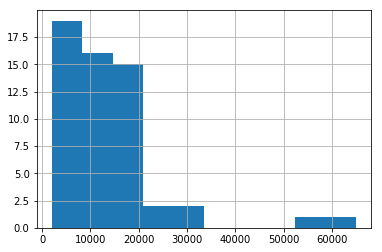